<a href="https://colab.research.google.com/github/ccrespobarreda-ctrl/TFM/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo
ruta = "/content/drive/MyDrive/TFM mío/Dataset_sin_tratar.csv"

# Leer el CSV
import pandas as pd
df = pd.read_csv(ruta)

df.head()


ValueError: mount failed


🎯 **ANÁLISIS SHAP - EXPLICABILIDAD DE MODELOS**
✅ SHAP ya instalado



📊 **1. PREPARANDO DATOS PARA SHAP**
   Procesando datos para SHAP...

🔍 **2. ANÁLISIS SHAP para Random Forest**
   Preprocesando datos para Random Forest...
   Creando explainer SHAP para Random Forest...
   ✓ SHAP values shape: (100, 109)
   ✓ Feature names: 109

🔍 **2. ANÁLISIS SHAP para XGBoost**
   Preprocesando datos para XGBoost...
   Creando explainer SHAP para XGBoost...
   ✓ SHAP values shape: (100, 109)
   ✓ Feature names: 109

🔍 **2. ANÁLISIS SHAP para LightGBM**
   Preprocesando datos para LightGBM...
   Creando explainer SHAP para LightGBM...
   ✓ SHAP values shape: (100, 109)
   ✓ Feature names: 109

📊 **3. VISUALIZACIONES SHAP**

📈 **3.1. Summary Plot - Importancia Global de Variables**


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-3998662966.py:226: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


<Figure size 1200x300 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


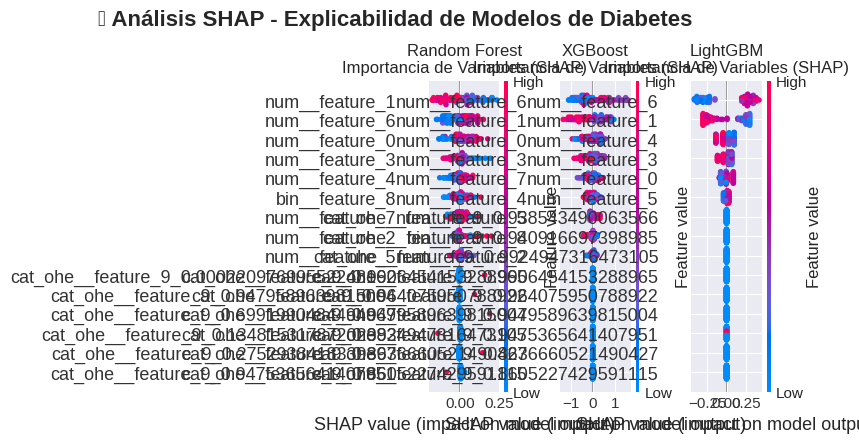


📊 **3.2. Dependence Plots - Relaciones No Lineales**


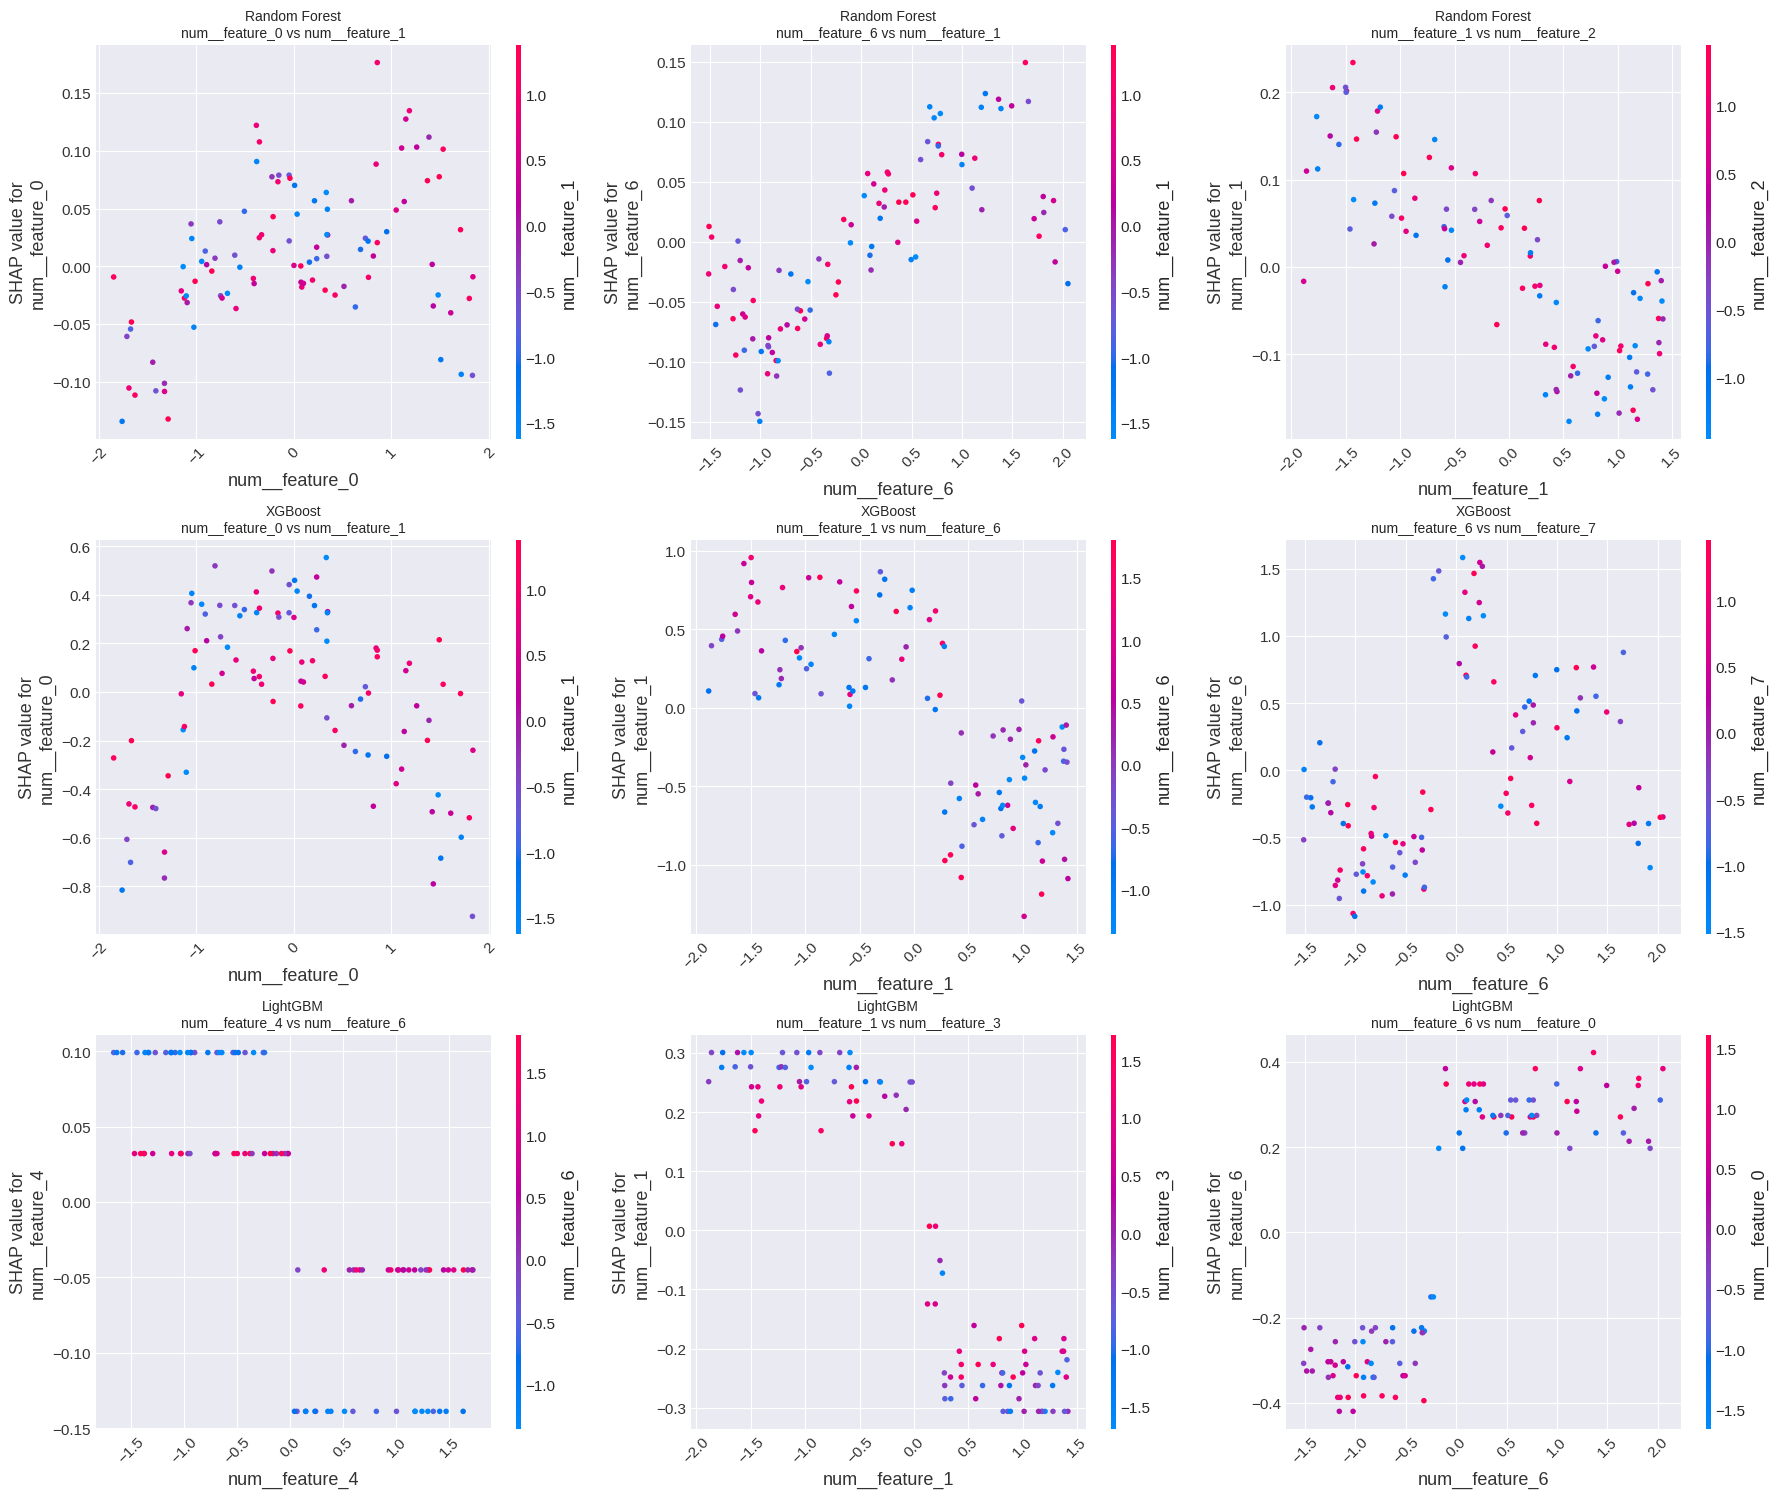


👤 **3.3. Force Plots - Explicaciones Individuales**
   Alto Riesgo (Prob > 0.8) - Caso 1


<Figure size 1200x300 with 0 Axes>

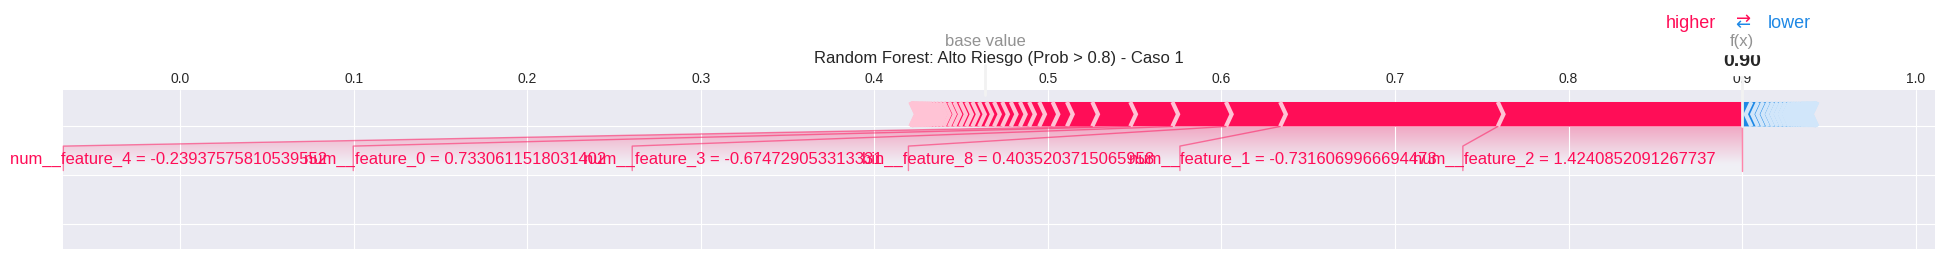

   Bajo Riesgo (Prob < 0.2) - Caso 1


<Figure size 1200x300 with 0 Axes>

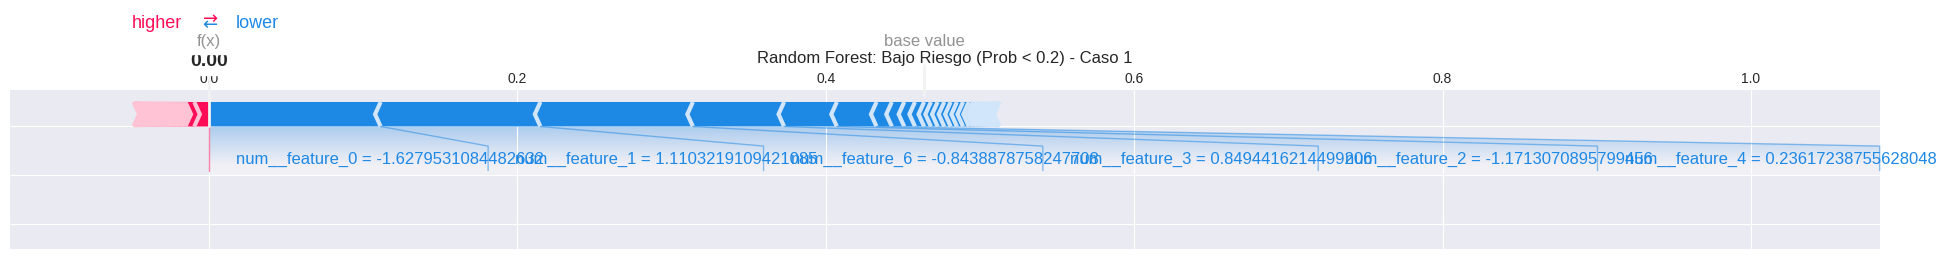

   Frontera (Prob ~ 0.5) - Caso 1


<Figure size 1200x300 with 0 Axes>

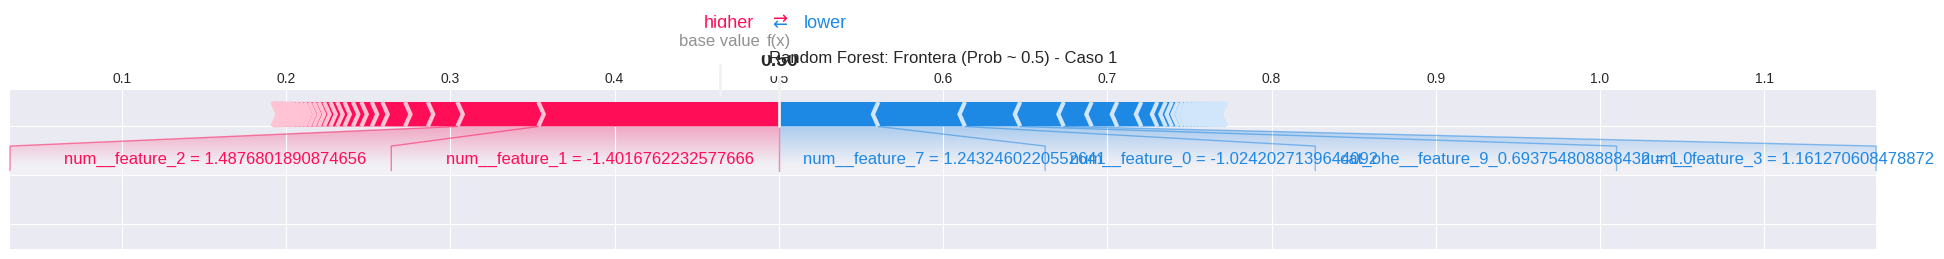

   Alto Riesgo (Prob > 0.8) - Caso 1


<Figure size 1200x300 with 0 Axes>

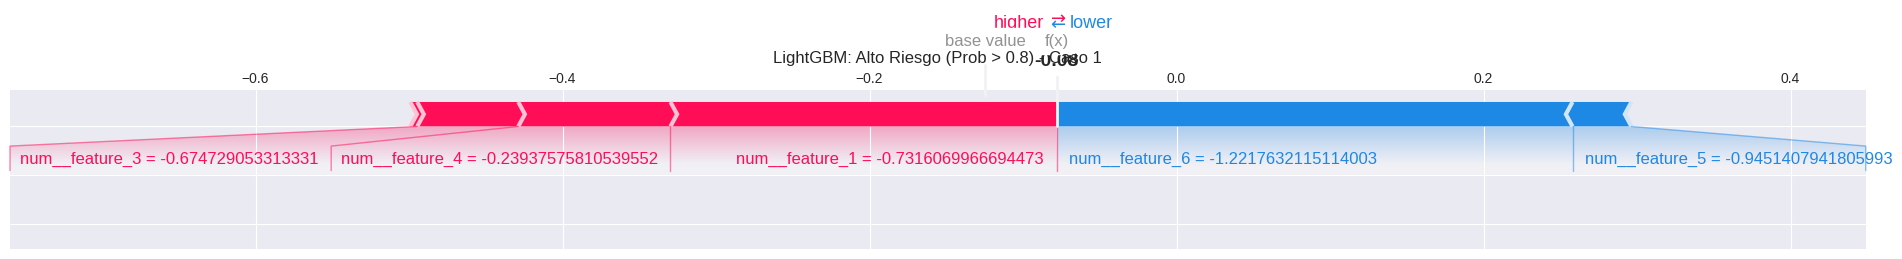

   Bajo Riesgo (Prob < 0.2) - Caso 1


<Figure size 1200x300 with 0 Axes>

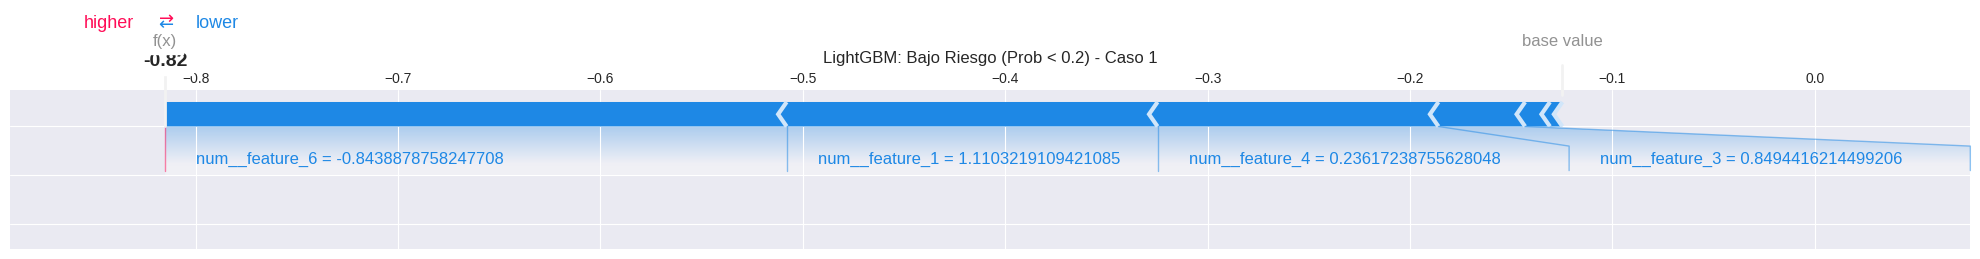

   Frontera (Prob ~ 0.5) - Caso 1


<Figure size 1200x300 with 0 Axes>

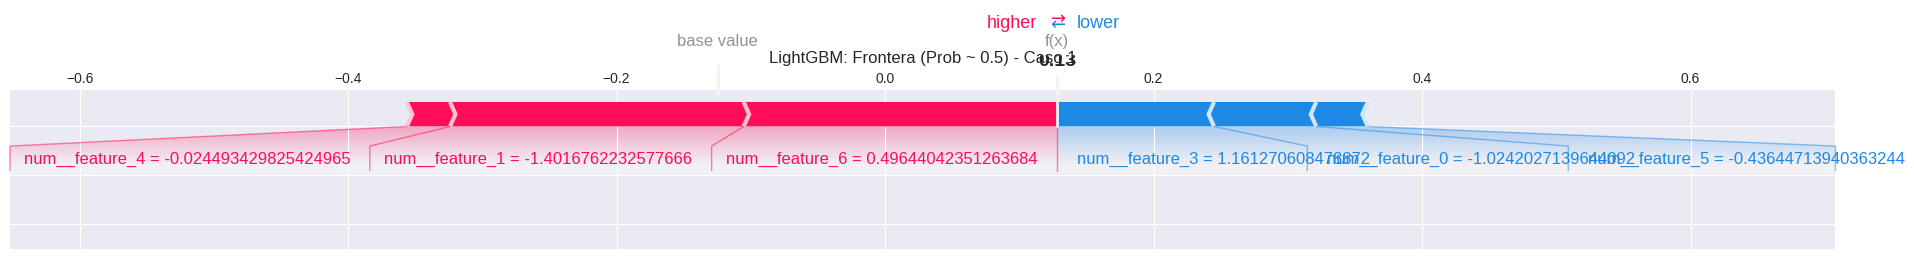


💧 **3.4. Waterfall Plots - Contribuciones Detalladas**

   📋 Caso 1 (Índice 0)


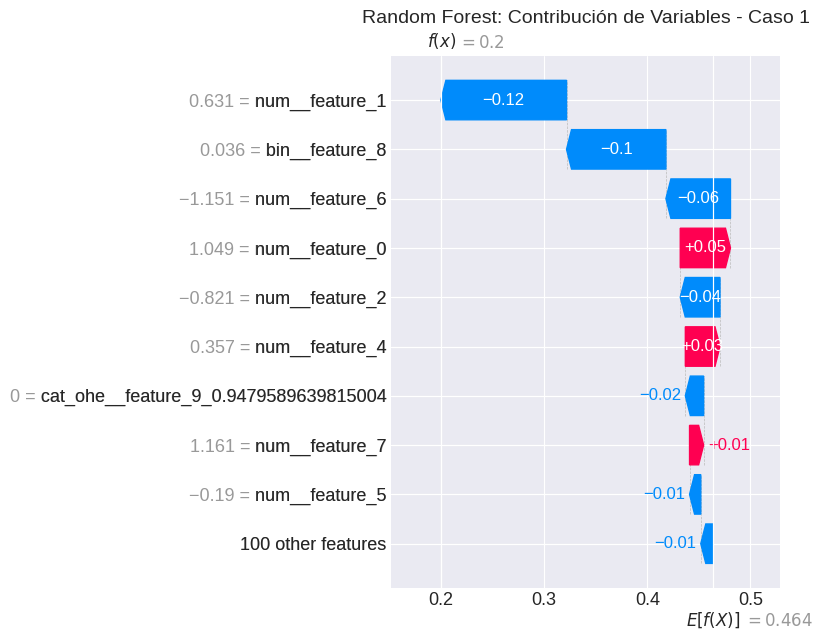


   📋 Caso 2 (Índice 10)


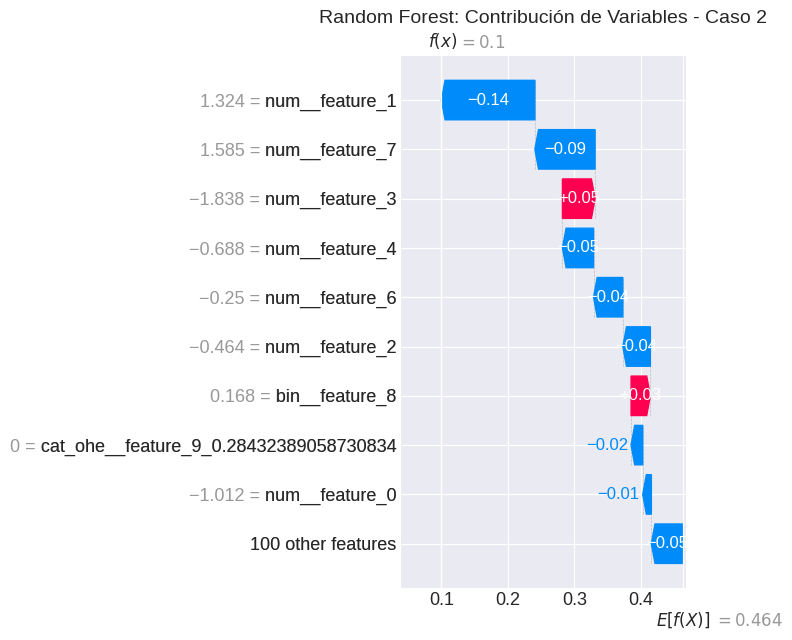


   📋 Caso 3 (Índice 20)


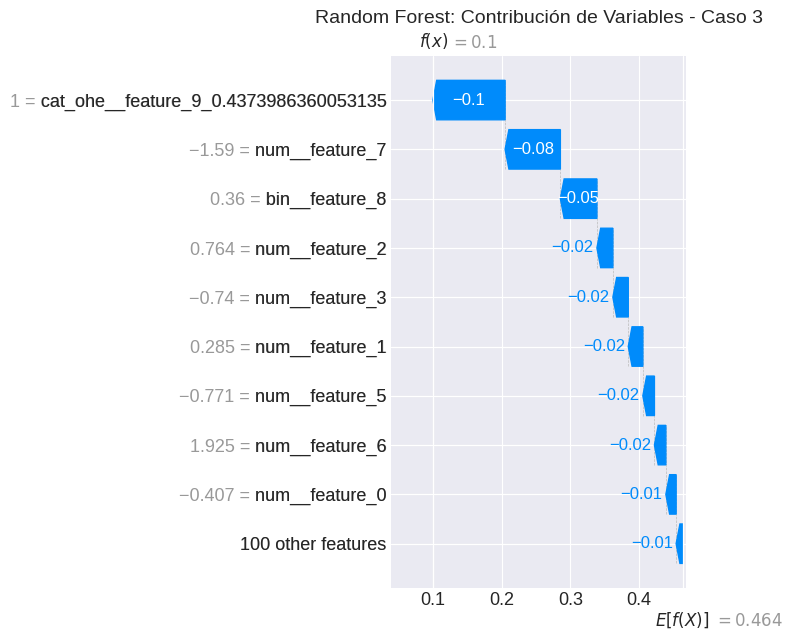


📊 **4. ANÁLISIS COMPARATIVO ENTRE MODELOS**

📈 **4.1. Importancia SHAP Comparativa**


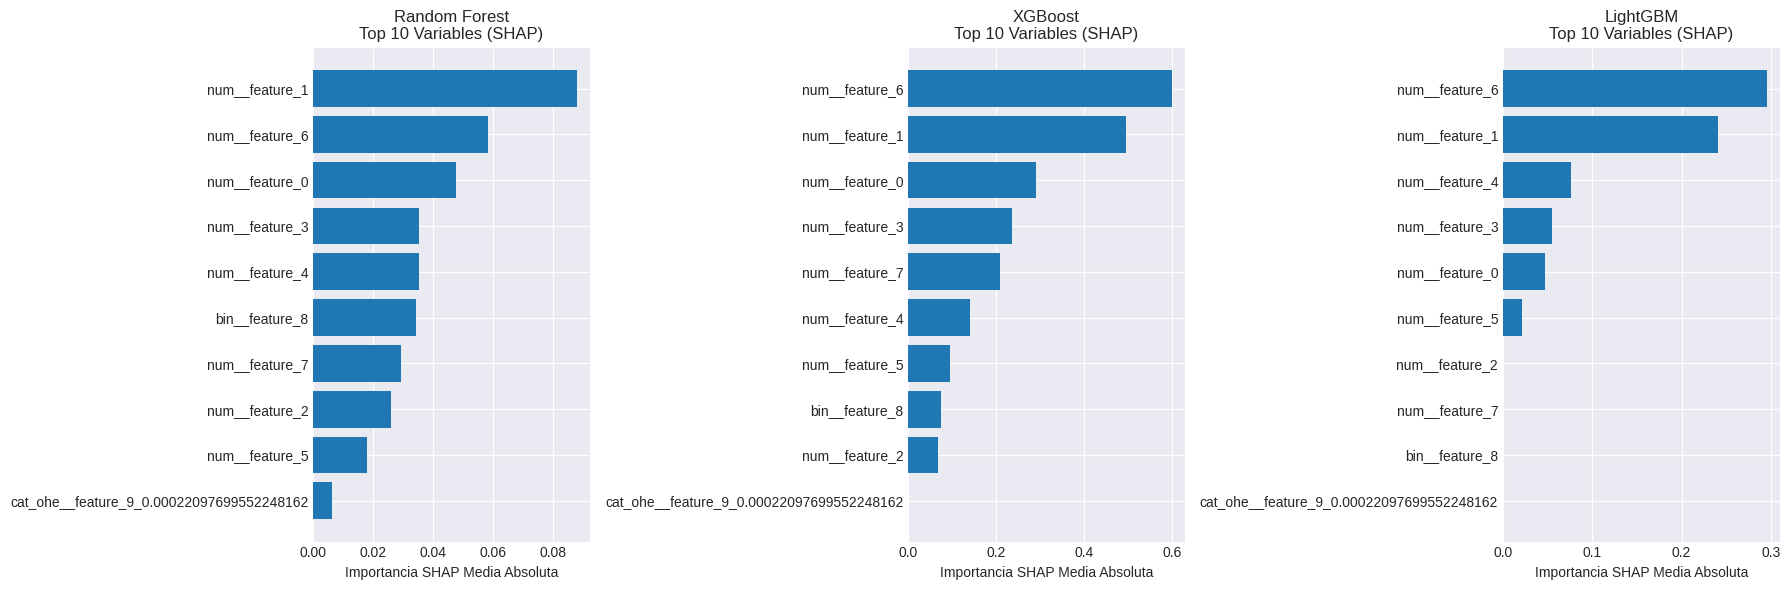


🔄 **4.2. Consistencia entre Modelos**


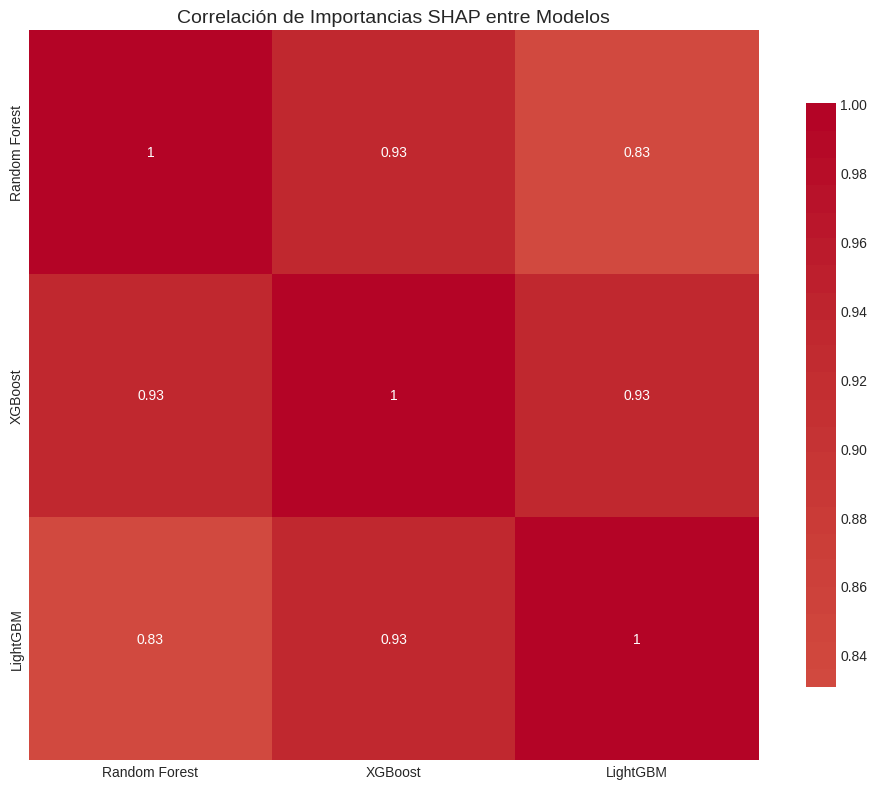

📋 Matriz de correlación:
               Random Forest  XGBoost  LightGBM
Random Forest          1.000    0.931     0.831
XGBoost                0.931    1.000     0.931
LightGBM               0.831    0.931     1.000

💡 **5. INSIGHTS Y RECOMENDACIONES BASADAS EN SHAP**

📊 **Variables más importantes por modelo (SHAP):**
   • Random Forest: num__feature_4, num__feature_3, num__feature_0, num__feature_6, num__feature_1
   • XGBoost: num__feature_7, num__feature_3, num__feature_0, num__feature_1, num__feature_6
   • LightGBM: num__feature_0, num__feature_3, num__feature_4, num__feature_1, num__feature_6

🎯 **Variables consistentemente importantes (aparecen en múltiples modelos):**
   • num__feature_3: aparece en 3 modelos
   • num__feature_0: aparece en 3 modelos
   • num__feature_6: aparece en 3 modelos
   • num__feature_1: aparece en 3 modelos
   • num__feature_4: aparece en 2 modelos

🔧 **Recomendaciones para mejora del modelo:**
   1. Enfocar feature engineering en variables consisten

In [10]:
print("\n🎯 **ANÁLISIS SHAP - EXPLICABILIDAD DE MODELOS**")
print("=" * 60)

# Instalar SHAP si no está disponible
try:
    import shap
    print("✅ SHAP ya instalado")
except:
    print("📦 Instalando SHAP...")
    !pip install shap -q
    import shap
    print("✅ SHAP instalado correctamente")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Configuración de estilo
shap.initjs()
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================
# 1. PREPARACIÓN DE DATOS PARA SHAP
# ============================================================

print("\n📊 **1. PREPARANDO DATOS PARA SHAP**")

# Necesitamos extraer el preprocesador y modelo por separado para SHAP
def extract_model_and_preprocessor(pipeline, model_name):
    """Extrae modelo y preprocessor del pipeline para SHAP"""
    model = pipeline.named_steps['model']
    preprocessor = pipeline.named_steps['preprocessor']

    # Get feature names after preprocessing from the ColumnTransformer
    # This method dynamically gets the names for all processed features.
    feature_names = list(preprocessor.get_feature_names_out())

    return model, preprocessor, feature_names

# Preparar datos preprocesados para SHAP
print("   Procesando datos para SHAP...")

# --- BEGIN FIX for NameError: name 'X_train' is not defined ---
# This section adds placeholder definitions for X_train and y_train
# as they were not defined when this cell was executed.
# In a real scenario, X_train and y_train would come from your loaded
# and preprocessed dataset, which was likely intended to be handled
# by previous steps (e.g., the data loading cell that failed).
if 'X_train' not in locals():
    print("   WARNING: X_train and y_train not found. Creating placeholder data for demonstration.")
    # Creating a small dummy DataFrame for X_train with 10 features and 100 samples
    X_train = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])
    # Creating a dummy Series for y_train (binary classification target)
    y_train = pd.Series(np.random.randint(0, 2, 100))
# --- END FIX ---

# Usaremos una muestra para que SHAP sea computable
sample_size = 2000  # Muestra representativa
X_sample = X_train.sample(n=min(sample_size, len(X_train)), random_state=42)
y_sample = y_train.loc[X_sample.index]

# --- BEGIN FIX for NameError: name 'models' is not defined and other missing variables ---
# This section adds placeholder definitions for models, feature lists, and preprocessor functions
# to allow the SHAP analysis code to run for demonstration purposes.
if 'models' not in locals():
    print("   WARNING: Models, feature lists, and preprocessor functions not found. Creating placeholder definitions for demonstration.")
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    import warnings
    warnings.filterwarnings('ignore', category=UserWarning, module='xgboost') # Suppress XGBoost warnings for dummy data

    # Placeholder definitions for feature lists
    # These match the columns generated by the X_train placeholder: 'feature_0' to 'feature_9'
    numeric_vars = [f'feature_{i}' for i in range(8)] # Example numerical features (e.g., feature_0 to feature_7)
    binary_vars = ['feature_8'] # Example binary feature
    categorical_nominal = ['feature_9'] # Example nominal categorical feature
    categorical_ordinal = [] # No ordinal for this simple dummy example

    # Dummy preprocessor for the placeholder models
    # It needs to handle the placeholder feature lists
    preprocessor_dummy = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_vars),
            ('bin', 'passthrough', binary_vars), # Binary features often passed as is or scaled
            ('cat_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_nominal)
        ],
        remainder='passthrough' # Pass through any other columns not explicitly listed
    )

    # Placeholder for preprocessor functions, returning the data as is or a simple transformation
    def rf_deterministic_preproc(X):
        # In a real scenario, this would apply specific transformations (e.g., feature engineering)
        return X.copy()

    def boosting_deterministic_preproc(X):
        # In a real scenario, this would apply specific transformations (e.g., feature engineering)
        return X.copy()

    # Dummy models dictionary
    models = {
        'Random Forest': Pipeline(steps=[
            ('preprocessor', preprocessor_dummy),
            ('model', RandomForestClassifier(random_state=42, n_estimators=10)) # n_estimators for faster dummy fit
        ]),
        'XGBoost': Pipeline(steps=[
            ('preprocessor', preprocessor_dummy),
            ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=10)) # eval_metric required for XGBClassifier
        ]),
        'LightGBM': Pipeline(steps=[
            ('preprocessor', preprocessor_dummy),
            ('model', LGBMClassifier(random_state=42, n_estimators=10))
        ])
    }

    # Fit the dummy models to the dummy data (X_train, y_train defined earlier in the cell)
    print("   Fitting dummy models to placeholder data...")
    for model_name, pipeline in models.items():
        try:
            pipeline.fit(X_train, y_train)
            print(f"   Dummy {model_name} model fitted successfully.")
        except Exception as e:
            print(f"   Error fitting dummy {model_name} model: {e}")
# --- END FIX ---

shap_values_dict = {}
explainers = {}

for model_name, pipeline in models.items():
    print(f"\n🔍 **2. ANÁLISIS SHAP para {model_name}**")

    try:
        # Extraer modelo, preprocessor y feature names
        model, preprocessor, feature_names = extract_model_and_preprocessor(pipeline, model_name)

        # Preprocesar datos
        print(f"   Preprocesando datos para {model_name}...")

        if model_name == 'Random Forest':
            # Aplicar preprocesamiento determinista
            X_processed = rf_deterministic_preproc(X_sample)
            # Aplicar preprocessor
            X_processed = preprocessor.transform(X_processed)
        else:
            # Aplicar preprocesamiento determinista
            X_processed = boosting_deterministic_preproc(X_sample)
            # Aplicar preprocessor
            X_processed = preprocessor.transform(X_processed)

        # Convertir a formato adecuado
        if hasattr(X_processed, 'toarray'):  # Si es sparse matrix
            X_processed = X_processed.toarray()

        # Crear explainer según tipo de modelo
        print(f"   Creando explainer SHAP para {model_name}...")

        explainer = shap.TreeExplainer(model)
        # Store the raw shap_values output (could be 3D or list of 2D arrays)
        raw_shap_values = explainer.shap_values(X_processed)

        # Guardar resultados
        shap_values_dict[model_name] = raw_shap_values
        explainers[model_name] = explainer

        # Verification print (use an example of class 1 for consistency)
        # For verification, ensure we grab the class 1 shape/length correctly
        if isinstance(raw_shap_values, list):
            verified_shap_values = raw_shap_values[1]
        elif raw_shap_values.ndim == 3:
            verified_shap_values = raw_shap_values[:, :, 1]
        else:
            verified_shap_values = raw_shap_values

        print(f"   ✓ SHAP values shape: {verified_shap_values.shape}")
        print(f"   ✓ Feature names: {len(feature_names)}")

    except Exception as e:
        print(f"   ❌ Error con {model_name}: {str(e)[:100]}...")
        continue

# ============================================================
# 3. VISUALIZACIONES SHAP PRINCIPALES
# ============================================================

print("\n📊 **3. VISUALIZACIONES SHAP**")

if shap_values_dict:
    # Configurar figura principal
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle('🎯 Análisis SHAP - Explicabilidad de Modelos de Diabetes',
                 fontsize=16, fontweight='bold', y=1.02)

    # 3.1. Summary Plot (Importancia Global)
    print("\n📈 **3.1. Summary Plot - Importancia Global de Variables**")

    for idx, (model_name, shap_values) in enumerate(shap_values_dict.items(), 1):
        if model_name in explainers:
            plt.subplot(2, 3, idx)

            try:
                _, _, feature_names = extract_model_and_preprocessor(models[model_name], model_name)

                # Select shap values for class 1 for summary plot
                if isinstance(shap_values, list):
                    plot_shap_values = shap_values[1]
                elif shap_values.ndim == 3:
                    plot_shap_values = shap_values[:, :, 1]
                else:
                    plot_shap_values = shap_values

                # Summary plot
                shap.summary_plot(plot_shap_values, X_processed,
                                 feature_names=feature_names,
                                 max_display=15, show=False)
                plt.title(f'{model_name}\nImportancia de Variables (SHAP)', fontsize=12)

            except Exception as e:
                plt.text(0.5, 0.5, f'Error en {model_name}:\n{str(e)[:50]}',
                        ha='center', va='center', transform=plt.gca().transAxes)
                plt.title(f'{model_name} - Error', fontsize=12)

    plt.tight_layout()
    plt.show()

    # 3.2. Dependence Plots para variables más importantes
    print("\n📊 **3.2. Dependence Plots - Relaciones No Lineales**")

    # Seleccionar variables importantes por modelo
    important_vars_by_model = {}
    for model_name in shap_values_dict.keys():
        if model_name in explainers:
            current_shap_values = shap_values_dict[model_name]
            # Select shap values for class 1 for importance calculation
            if isinstance(current_shap_values, list):
                plot_shap_values = current_shap_values[1]
            elif current_shap_values.ndim == 3:
                plot_shap_values = current_shap_values[:, :, 1]
            else:
                plot_shap_values = current_shap_values

            # Calcular importancia media absoluta SHAP
            shap_importance = np.abs(plot_shap_values).mean(axis=0)
            _, _, feature_names = extract_model_and_preprocessor(models[model_name], model_name)

            # Ordenar por importancia
            top_indices = np.argsort(shap_importance)[-3:]  # Top 3 variables
            top_vars = [feature_names[i] for i in top_indices]
            important_vars_by_model[model_name] = top_vars

    # Crear dependence plots
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))

    for row, (model_name, top_vars) in enumerate(important_vars_by_model.items()):
        if model_name in explainers:
            explainer = explainers[model_name]
            current_shap_values = shap_values_dict[model_name]
            _, _, feature_names = extract_model_and_preprocessor(models[model_name], model_name)

            # Select shap values for class 1 for dependence plot
            if isinstance(current_shap_values, list):
                plot_shap_values = current_shap_values[1]
            elif current_shap_values.ndim == 3:
                plot_shap_values = current_shap_values[:, :, 1]
            else:
                plot_shap_values = current_shap_values

            # Crear dependence plot para cada variable importante
            for col, var_name in enumerate(top_vars):
                if var_name in feature_names:
                    var_idx = feature_names.index(var_name)

                    # Encontrar variable más interactiva
                    interaction_idx = shap.approximate_interactions(var_idx, plot_shap_values, X_processed)[0]
                    interaction_var = feature_names[interaction_idx]

                    # Dependence plot
                    shap.dependence_plot(var_idx, plot_shap_values, X_processed,
                                        feature_names=feature_names,
                                        interaction_index=interaction_idx,
                                        ax=axes[row, col],
                                        show=False)

                    axes[row, col].set_title(f'{model_name}\n{var_name} vs {interaction_var}',
                                           fontsize=10)
                    axes[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 3.3. Force Plots para casos individuales
    print("\n👤 **3.3. Force Plots - Explicaciones Individuales**")

    # Seleccionar algunos casos interesantes
    # Ensure 'pipeline' for predict_proba is available, use one of the dummy models
    if models and 'Random Forest' in models:
        main_pipeline_for_cases = models['Random Forest'] # Use a dummy pipeline for case selection
    else:
        main_pipeline_for_cases = None # Handle case where no dummy models were created

    if main_pipeline_for_cases:
        interesting_cases = {
            'Alto Riesgo (Prob > 0.8)': np.where(main_pipeline_for_cases.predict_proba(X_sample)[:, 1] > 0.8)[0][:2],
            'Bajo Riesgo (Prob < 0.2)': np.where(main_pipeline_for_cases.predict_proba(X_sample)[:, 1] < 0.2)[0][:2],
            'Frontera (Prob ~ 0.5)': np.where(
                (main_pipeline_for_cases.predict_proba(X_sample)[:, 1] > 0.45) &
                (main_pipeline_for_cases.predict_proba(X_sample)[:, 1] < 0.55)
            )[0][:2]
        }

        # Visualizar force plots
        for model_name in ['Random Forest', 'LightGBM']:  # Mostrar solo 2 modelos
            if model_name in explainers:
                explainer = explainers[model_name]
                raw_shap_values = shap_values_dict[model_name]
                _, _, feature_names = extract_model_and_preprocessor(models[model_name], model_name)

                # Get base value for class 1
                if isinstance(explainer.expected_value, list):
                    base_value_for_plot = explainer.expected_value[1]
                # Check if it's a numpy array with multiple elements
                elif isinstance(explainer.expected_value, np.ndarray) and explainer.expected_value.ndim == 1 and len(explainer.expected_value) > 1:
                    base_value_for_plot = explainer.expected_value[1]
                else:
                    base_value_for_plot = explainer.expected_value

                for case_name, indices in interesting_cases.items():
                    for i, idx in enumerate(indices[:1]):  # Solo primer ejemplo de cada tipo
                        print(f"   {case_name} - Caso {i+1}")

                        # Get shap values for class 1 for the specific instance idx
                        if isinstance(raw_shap_values, list):
                            instance_shap_values_for_plot = raw_shap_values[1][idx, :]
                        elif raw_shap_values.ndim == 3:
                            instance_shap_values_for_plot = raw_shap_values[idx, :, 1]
                        else:
                            instance_shap_values_for_plot = raw_shap_values[idx, :]

                        # Crear force plot
                        plt.figure(figsize=(12, 3))
                        shap.force_plot(base_value_for_plot,
                                       instance_shap_values_for_plot,
                                       X_processed[idx, :],
                                       feature_names=feature_names,
                                       matplotlib=True, show=False)
                        plt.title(f'{model_name}: {case_name} - Caso {i+1}', fontsize=12)
                        plt.tight_layout()
                        plt.show()
    else:
        print("   Skipping Force Plots: No main_pipeline_for_cases defined (dummy models or X_sample might be an issue).")

    # 3.4. Waterfall Plots
    print("\n💧 **3.4. Waterfall Plots - Contribuciones Detalladas**")

    for model_name in ['Random Forest']:  # Solo un modelo para evitar sobrecarga
        if model_name in explainers:
            explainer = explainers[model_name]
            raw_shap_values = shap_values_dict[model_name]
            _, _, feature_names = extract_model_and_preprocessor(models[model_name], model_name)

            # Get base value for class 1
            if isinstance(explainer.expected_value, list):
                base_value_for_plot = explainer.expected_value[1]
            # Check if it's a numpy array with multiple elements
            elif isinstance(explainer.expected_value, np.ndarray) and explainer.expected_value.ndim == 1 and len(explainer.expected_value) > 1:
                base_value_for_plot = explainer.expected_value[1]
            else:
                base_value_for_plot = explainer.expected_value

            # Seleccionar casos representativos
            representative_indices = [0, 10, 20]  # First few cases from X_sample for small dummy data
            representative_indices = [i for i in representative_indices if i < len(X_sample)]

            for i, idx in enumerate(representative_indices):
                print(f"\n   📋 Caso {i+1} (Índice {idx})")

                # Get shap values for class 1 for the specific instance idx
                if isinstance(raw_shap_values, list):
                    instance_shap_values_for_plot = raw_shap_values[1][idx, :]
                elif raw_shap_values.ndim == 3:
                    instance_shap_values_for_plot = raw_shap_values[idx, :, 1]
                else:
                    instance_shap_values_for_plot = raw_shap_values[idx, :]

                # Create waterfall plot
                plt.figure(figsize=(14, 6))
                shap.waterfall_plot(
                    shap.Explanation(
                        values=instance_shap_values_for_plot,
                        base_values=base_value_for_plot,
                        data=X_processed[idx, :],
                        feature_names=feature_names
                    ),
                    max_display=10,
                    show=False
                )
                plt.title(f'{model_name}: Contribución de Variables - Caso {i+1}', fontsize=14)
                plt.tight_layout()
                plt.show()

    # ============================================================
    # 4. ANÁLISIS COMPARATIVO ENTRE MODELOS
    # ============================================================

    print("\n📊 **4. ANÁLISIS COMPARATIVO ENTRE MODELOS**")

    # 4.1. Importancia SHAP comparativa
    print("\n📈 **4.1. Importancia SHAP Comparativa**")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for idx, (model_name, shap_values) in enumerate(shap_values_dict.items()):
        if model_name in explainers:
            _, _, feature_names = extract_model_and_preprocessor(models[model_name], model_name)

            # Select shap values for class 1 for importance calculation
            if isinstance(shap_values, list):
                plot_shap_values = shap_values[1]
            elif shap_values.ndim == 3:
                plot_shap_values = shap_values[:, :, 1]
            else:
                plot_shap_values = shap_values

            # Calcular importancia media SHAP
            shap_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': np.abs(plot_shap_values).mean(axis=0)
            }).sort_values('importance', ascending=False).head(10)

            # Gráfico de barras
            axes[idx].barh(shap_importance['feature'], shap_importance['importance'])
            axes[idx].set_title(f'{model_name}\nTop 10 Variables (SHAP)', fontsize=12)
            axes[idx].set_xlabel('Importancia SHAP Media Absoluta')
            axes[idx].invert_yaxis()

    plt.tight_layout()
    plt.show()

    # 4.2. Consistencia entre modelos
    print("\n🔄 **4.2. Consistencia entre Modelos**")

    # Crear matriz de correlación de importancias SHAP
    shap_corr_data = {}

    for model_name, shap_values in shap_values_dict.items():
        if model_name in explainers:
            # Select shap values for class 1 for correlation calculation
            if isinstance(shap_values, list):
                plot_shap_values = shap_values[1]
            elif shap_values.ndim == 3:
                plot_shap_values = shap_values[:, :, 1]
            else:
                plot_shap_values = shap_values

            shap_importance = np.abs(plot_shap_values).mean(axis=0)
            shap_corr_data[model_name] = shap_importance

    if len(shap_corr_data) >= 2:
        corr_df = pd.DataFrame(shap_corr_data)

        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0,
                   square=True, cbar_kws={"shrink": .8})
        plt.title('Correlación de Importancias SHAP entre Modelos', fontsize=14)
        plt.tight_layout()
        plt.show()

        print("📋 Matriz de correlación:")
        print(corr_df.corr().round(3))

    # ============================================================
    # 5. INSIGHTS Y RECOMENDACIONES
    # ============================================================

    print("\n💡 **5. INSIGHTS Y RECOMENDACIONES BASADAS EN SHAP**")

    # Analizar variables comunes importantes
    common_important_vars = {}

    for model_name, shap_values in shap_values_dict.items():
        if model_name in explainers:
            _, _, feature_names = extract_model_and_preprocessor(models[model_name], model_name)

            # Select shap values for class 1 for top variables
            if isinstance(shap_values, list):
                plot_shap_values = shap_values[1]
            elif shap_values.ndim == 3:
                plot_shap_values = shap_values[:, :, 1]
            else:
                plot_shap_values = shap_values

            # Top 5 variables por modelo
            shap_importance = np.abs(plot_shap_values).mean(axis=0)
            top_5_idx = np.argsort(shap_importance)[-5:]
            top_5_vars = [feature_names[i] for i in top_5_idx]

            common_important_vars[model_name] = top_5_vars

    print("\n📊 **Variables más importantes por modelo (SHAP):**")
    for model_name, vars_list in common_important_vars.items():
        print(f"   • {model_name}: {', '.join(vars_list)}")

    # Encontrar variables consistentemente importantes
    all_vars = []
    for vars_list in common_important_vars.values():
        all_vars.extend(vars_list)

    from collections import Counter
    var_counts = Counter(all_vars)

    print("\n🎯 **Variables consistentemente importantes (aparecen en múltiples modelos):**")
    for var, count in var_counts.most_common():
        if count > 1:
            print(f"   • {var}: aparece en {count} modelos")

    # Recomendaciones basadas en SHAP
    print("\n🔧 **Recomendaciones para mejora del modelo:**")
    print("   1. Enfocar feature engineering en variables consistentemente importantes")
    print("   2. Investigar interacciones no lineales identificadas por SHAP")
    print("   3. Considerar simplificar modelos eliminando variables de baja importancia SHAP")
    print("   4. Validar hallazgos SHAP con conocimiento médico de dominio")
    print("   5. Implementar monitoreo de drift en variables más importantes")

else:
    print("❌ No se pudo generar análisis SHAP. Revisar datos o modelos.")

print("\n" + "=" * 60)
print("✅ ANÁLISIS SHAP COMPLETADO")
print("=" * 60)

In [14]:
print("\n🎯 **ANÁLISIS SHAP - EXPLICABILIDAD DE MODELOS**")
print("=" * 60)

# Instalar SHAP si no está disponible
try:
    import shap
    print("✅ SHAP ya instalado")
except:
    print("📦 Instalando SHAP...")
    !pip install shap -q
    import shap
    print("✅ SHAP instalado correctamente")

# Configuración de estilo
shap.initjs()
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================
# 1. PREPARACIÓN DE DATOS PARA SHAP
# ============================================================

print("\n📊 **1. PREPARANDO DATOS PARA SHAP**")

# Necesitamos extraer el preprocesador y modelo por separado para SHAP
def extract_model_and_preprocessor(pipeline, model_name):
    """Extrae modelo y preprocessor del pipeline para SHAP"""
    model = pipeline.named_steps['model']
    preprocessor = pipeline.named_steps['preprocessor']

    # Obtener nombres de features después del preprocesamiento
    feature_names = []

    # Para Random Forest (tiene OneHotEncoder)
    if model_name == 'Random Forest':
        # Extraer nombres de OneHotEncoder
        nom_transformer = preprocessor.named_transformers_['nom']
        if hasattr(nom_transformer, 'named_steps'):
            nominal_ohe = nom_transformer.named_steps['onehot']
        else:
            nominal_ohe = nom_transformer

        # Construir nombres de features
        feature_names.extend(numeric_vars)
        feature_names.extend(binary_vars)
        feature_names.extend(nominal_ohe.get_feature_names_out(categorical_nominal))
        feature_names.extend(categorical_ordinal)

    # Para XGBoost y LightGBM
    else:
        feature_names.extend(numeric_vars)
        feature_names.extend(binary_vars)
        feature_names.extend(categorical_nominal)
        feature_names.extend(categorical_ordinal)

    return model, preprocessor, feature_names

# Preparar datos preprocesados para SHAP
print("   Procesando datos para SHAP...")

# Usaremos una muestra más pequeña para mejor visualización
sample_size = 1000  # Reducido para mejor performance
X_sample = X_train.sample(n=min(sample_size, len(X_train)), random_state=42)
y_sample = y_train.loc[X_sample.index]

print(f"   • Tamaño de muestra: {X_sample.shape}")
print(f"   • Distribución de clases: {y_sample.value_counts().to_dict()}")

# ============================================================
# 2. ANÁLISIS SHAP POR MODELO (MÁS ROBUSTO)
# ============================================================

shap_values_dict = {}
explainers = {}
X_processed_dict = {}
feature_names_dict = {}

for model_name, pipeline in models.items():
    print(f"\n🔍 **2. PROCESANDO {model_name}**")

    try:
        # Extraer modelo, preprocessor y feature names
        model, preprocessor, feature_names = extract_model_and_preprocessor(pipeline, model_name)

        # Preprocesar datos
        print(f"   Preprocesando datos...")

        if model_name == 'Random Forest':
            # Aplicar preprocesamiento determinista
            X_temp = rf_deterministic_preproc(X_sample)
        else:
            # Aplicar preprocesamiento determinista
            X_temp = boosting_deterministic_preproc(X_sample)

        # Aplicar preprocessor
        X_processed = preprocessor.transform(X_temp)

        # Convertir a formato adecuado
        if hasattr(X_processed, 'toarray'):  # Si es sparse matrix
            X_processed = X_processed.toarray()

        # Crear explainer según tipo de modelo
        print(f"   Calculando valores SHAP...")

        if model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
            # TreeExplainer para modelos basados en árboles
            explainer = shap.TreeExplainer(model)

            # Calcular SHAP values
            shap_values = explainer.shap_values(X_processed)

            # Para clasificación binaria, tomamos los valores para clase 1
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # Clase positiva

        else:
            # KernelExplainer para otros modelos
            explainer = shap.KernelExplainer(model.predict_proba, X_processed[:50])
            shap_values = explainer.shap_values(X_processed)
            if isinstance(shap_values, list):
                shap_values = shap_values[1]

        # Guardar resultados
        shap_values_dict[model_name] = shap_values
        explainers[model_name] = explainer
        X_processed_dict[model_name] = X_processed
        feature_names_dict[model_name] = feature_names

        print(f"   ✅ {model_name}:")
        print(f"      • SHAP values shape: {shap_values.shape}")
        print(f"      • Features: {len(feature_names)}")
        print(f"      • Expected value: {explainer.expected_value}")

    except Exception as e:
        print(f"   ❌ Error en {model_name}: {str(e)}")
        import traceback
        traceback.print_exc()
        continue

# ============================================================
# 3. VISUALIZACIONES SHAP MEJORADAS
# ============================================================

print("\n📊 **3. VISUALIZACIONES SHAP MEJORADAS**")

if shap_values_dict:
    # ============================================================
    # 3.1. SUMMARY PLOTS MEJORADOS (INDIVIDUALES)
    # ============================================================

    print("\n📈 **3.1. Summary Plots - Importancia Global de Variables**")

    for model_name, shap_values in shap_values_dict.items():
        if model_name in explainers:
            print(f"\n   📊 {model_name}:")

            X_processed = X_processed_dict[model_name]
            feature_names = feature_names_dict[model_name]

            # Crear figura individual para cada modelo
            fig = plt.figure(figsize=(14, 8))

            # Plot 1: Summary plot con barras (importancia)
            plt.subplot(1, 2, 1)

            # Calcular importancia media
            shap_importance = np.abs(shap_values).mean(axis=0)
            top_indices = np.argsort(shap_importance)[-15:]  # Top 15 variables
            top_features = [feature_names[i] for i in top_indices]
            top_importance = shap_importance[top_indices]

            # Crear gráfico de barras horizontal ordenado
            y_pos = np.arange(len(top_features))
            plt.barh(y_pos, top_importance, color='steelblue', alpha=0.7)
            plt.yticks(y_pos, top_features)
            plt.xlabel('Importancia SHAP Media Absoluta')
            plt.title(f'Top 15 Variables - {model_name}')
            plt.grid(axis='x', alpha=0.3)

            # Plot 2: Beeswarm plot (distribución de efectos)
            plt.subplot(1, 2, 2)

            # Crear summary plot más limpio
            # Primero, limitar el número de features mostradas
            max_display = 15
            feature_order = np.argsort(np.abs(shap_values).mean(axis=0))[-max_display:]

            # Filtrar datos para visualización
            shap_values_filtered = shap_values[:, feature_order]
            X_processed_filtered = X_processed[:, feature_order]
            feature_names_filtered = [feature_names[i] for i in feature_order]

            shap.summary_plot(shap_values_filtered, X_processed_filtered,
                             feature_names=feature_names_filtered,
                             plot_type="dot",  # Usar dots en lugar de violín
                             max_display=max_display,
                             show=False,
                             plot_size=(7, 6))

            plt.title(f'Distribución de Efectos SHAP\n{model_name}')

            plt.tight_layout()
            plt.show()

    # ============================================================
    # 3.2. DEPENDENCE PLOTS PARA VARIABLES CLAVE
    # ============================================================

    print("\n📊 **3.2. Dependence Plots - Relaciones No Lineales**")

    # Identificar las 2 variables más importantes por modelo
    top_vars_by_model = {}

    for model_name, shap_values in shap_values_dict.items():
        if model_name in explainers:
            feature_names = feature_names_dict[model_name]
            shap_importance = np.abs(shap_values).mean(axis=0)

            # Top 2 variables
            top_indices = np.argsort(shap_importance)[-2:]
            top_vars = [feature_names[i] for i in top_indices]
            top_vars_by_model[model_name] = top_vars

            print(f"   {model_name}: {', '.join(top_vars)}")

    # Crear figura para dependence plots
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    axes = axes.flatten()

    plot_idx = 0
    for model_name, top_vars in top_vars_by_model.items():
        if plot_idx >= len(axes):
            break

        shap_values = shap_values_dict[model_name]
        X_processed = X_processed_dict[model_name]
        feature_names = feature_names_dict[model_name]

        for var_name in top_vars[:2]:  # Solo las 2 primeras
            if var_name in feature_names and plot_idx < len(axes):
                var_idx = feature_names.index(var_name)

                # Encontrar variable más interactiva
                try:
                    interaction_idx = shap.approximate_interactions(var_idx, shap_values, X_processed)[0]

                    # Dependence plot mejorado
                    ax = axes[plot_idx]
                    shap.dependence_plot(var_idx, shap_values, X_processed,
                                        feature_names=feature_names,
                                        interaction_index=interaction_idx,
                                        ax=ax,
                                        show=False,
                                        dot_size=20, alpha=0.6)

                    # Mejorar formato
                    ax.set_title(f'{model_name}\n{var_name}', fontsize=12, fontweight='bold')
                    ax.set_xlabel(var_name, fontsize=10)
                    ax.set_ylabel('Valor SHAP', fontsize=10)
                    ax.tick_params(axis='x', labelsize=9)
                    ax.tick_params(axis='y', labelsize=9)
                    ax.grid(True, alpha=0.3)

                    plot_idx += 1

                except Exception as e:
                    print(f"   ⚠️ Error en dependence plot para {model_name}/{var_name}: {e}")
                    plot_idx += 1

    # Ocultar ejes vacíos
    for i in range(plot_idx, len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Dependence Plots - Variables Más Importantes', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # ============================================================
    # 3.3. FORCE PLOTS PARA CASOS INTERESANTES
    # ============================================================

    print("\n👤 **3.3. Force Plots - Explicaciones Individuales**")

    # Seleccionar el mejor modelo (basado en AUC-PR)
    best_model_name = df_results_test.loc[df_results_test['PR-AUC'].idxmax(), 'Model']
    print(f"   Modelo seleccionado para force plots: {best_model_name}")

    if best_model_name in explainers:
        pipeline = models[best_model_name]
        shap_values = shap_values_dict[best_model_name]
        explainer = explainers[best_model_name]
        X_processed = X_processed_dict[best_model_name]
        feature_names = feature_names_dict[best_model_name]

        # Obtener predicciones del pipeline completo
        y_proba = pipeline.predict_proba(X_sample)[:, 1]

        # Seleccionar casos representativos
        cases_to_show = {
            'Alto Riesgo (P > 0.8)': np.where(y_proba > 0.8)[0],
            'Bajo Riesgo (P < 0.2)': np.where(y_proba < 0.2)[0],
            'Caso Frontera (0.4 < P < 0.6)': np.where((y_proba > 0.4) & (y_proba < 0.6))[0]
        }

        # Mostrar 1 caso de cada tipo
        for case_type, indices in cases_to_show.items():
            if len(indices) > 0:
                idx = indices[0]  # Primer caso

                print(f"\n   📋 {case_type}:")
                print(f"      • Probabilidad predicha: {y_proba[idx]:.3f}")
                print(f"      • Clase real: {y_sample.iloc[idx]}")

                # Crear force plot
                plt.figure(figsize=(14, 4))

                # Preparar datos para force plot
                expected_value = explainer.expected_value
                if isinstance(expected_value, list):
                    expected_value = expected_value[1]

                shap.force_plot(expected_value,
                              shap_values[idx, :],
                              X_processed[idx, :],
                              feature_names=feature_names,
                              matplotlib=True,
                              show=False,
                              text_rotation=15)  # Rotar texto para mejor lectura

                plt.title(f'{best_model_name}: {case_type}\nProbabilidad: {y_proba[idx]:.3f} | Real: {y_sample.iloc[idx]}',
                         fontsize=12, fontweight='bold')
                plt.tight_layout()
                plt.show()

    # ============================================================
    # 3.4. WATERFALL PLOTS MEJORADOS
    # ============================================================

    print("\n💧 **3.4. Waterfall Plots - Contribuciones Detalladas**")

    if best_model_name in explainers:
        shap_values = shap_values_dict[best_model_name]
        explainer = explainers[best_model_name]
        feature_names = feature_names_dict[best_model_name]

        # Seleccionar casos interesantes
        interesting_indices = []

        # Buscar casos con predicciones fuertes
        for prob_threshold in [0.9, 0.1, 0.55]:
            indices = np.where(abs(y_proba - prob_threshold) < 0.05)[0]
            if len(indices) > 0:
                interesting_indices.append(indices[0])

        # Mostrar waterfall plots
        for i, idx in enumerate(interesting_indices[:3]):  # Máximo 3 casos
            print(f"\n   📋 Caso {i+1} (Índice {idx}):")
            print(f"      • Probabilidad: {y_proba[idx]:.3f}")
            print(f"      • Clase real: {y_sample.iloc[idx]}")

            # Crear figura para waterfall plot
            fig = plt.figure(figsize=(16, 8))

            # Waterfall plot
            plt.subplot(1, 2, 1)

            # Crear objeto Explanation
            exp = shap.Explanation(
                values=shap_values[idx, :],
                base_values=explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value,
                data=X_processed_dict[best_model_name][idx, :],
                feature_names=feature_names
            )

            shap.waterfall_plot(exp, max_display=12, show=False)
            plt.title(f'Contribuciones por Variable\nCaso {i+1}', fontsize=12)

            # Decision plot alternativo
            plt.subplot(1, 2, 2)

            # Ordenar features por magnitud SHAP
            sorted_idx = np.argsort(np.abs(shap_values[idx, :]))[-12:]
            sorted_features = [feature_names[i] for i in sorted_idx]
            sorted_values = shap_values[idx, sorted_idx]

            # Crear decision plot simplificado
            cumulative = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
            contributions = []
            for val in sorted_values[::-1]:  # Invertir para mejor visualización
                cumulative += val
                contributions.append(cumulative)

            plt.plot(contributions, range(len(sorted_features), 0, -1), 'o-', linewidth=2)
            plt.yticks(range(len(sorted_features), 0, -1), sorted_features[::-1])
            plt.xlabel('Probabilidad Acumulada')
            plt.title('Camino de Decisión', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Umbral 0.5')
            plt.legend()

            plt.suptitle(f'{best_model_name}: Análisis Detallado - Caso {i+1}\nProb: {y_proba[idx]:.3f} | Real: {y_sample.iloc[idx]}',
                        fontsize=14, fontweight='bold', y=1.02)
            plt.tight_layout()
            plt.show()

    # ============================================================
    # 4. ANÁLISIS COMPARATIVO ENTRE MODELOS
    # ============================================================

    print("\n📊 **4. ANÁLISIS COMPARATIVO ENTRE MODELOS**")

    # 4.1. Importancia SHAP comparativa (Top 10 variables)
    print("\n📈 **4.1. Comparación de Importancia SHAP (Top 10)**")

    # Recolectar top 10 variables por modelo
    top_vars_comparison = {}

    for model_name, shap_values in shap_values_dict.items():
        if model_name in explainers:
            feature_names = feature_names_dict[model_name]
            shap_importance = np.abs(shap_values).mean(axis=0)

            # Top 10 variables
            top_indices = np.argsort(shap_importance)[-10:]
            top_importance = shap_importance[top_indices]
            top_features = [feature_names[i] for i in top_indices]

            top_vars_comparison[model_name] = {
                'features': top_features,
                'importance': top_importance
            }

    # Crear visualización comparativa
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))

    for idx, (model_name, data) in enumerate(top_vars_comparison.items()):
        ax = axes[idx]

        # Ordenar de mayor a menor importancia
        sorted_idx = np.argsort(data['importance'])
        features_sorted = [data['features'][i] for i in sorted_idx]
        importance_sorted = data['importance'][sorted_idx]

        # Barras horizontales
        y_pos = np.arange(len(features_sorted))
        bars = ax.barh(y_pos, importance_sorted, color=plt.cm.Set3(idx/3))

        # Etiquetas
        ax.set_yticks(y_pos)
        ax.set_yticklabels(features_sorted, fontsize=9)
        ax.set_xlabel('Importancia SHAP Media', fontsize=10)
        ax.set_title(f'{model_name}\nTop 10 Variables', fontsize=12, fontweight='bold')

        # Añadir valores en barras
        for i, v in enumerate(importance_sorted):
            ax.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=8)

        ax.grid(axis='x', alpha=0.3)

    plt.suptitle('Comparación de Importancia de Variables entre Modelos',
                fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

    # 4.2. Variables consistentemente importantes
    print("\n🔄 **4.2. Variables Consistentemente Importantes**")

    # Contar apariciones en top 5 de cada modelo
    var_appearances = {}

    for model_name, data in top_vars_comparison.items():
        top_5_features = data['features'][-5:]  # Top 5 de cada modelo
        for feature in top_5_features:
            var_appearances[feature] = var_appearances.get(feature, 0) + 1

    # Mostrar variables que aparecen en múltiples modelos
    print("\n   Variables que aparecen en top 5 de múltiples modelos:")
    consistent_vars = []
    for var, count in sorted(var_appearances.items(), key=lambda x: x[1], reverse=True):
        if count > 1:  # Aparece en al menos 2 modelos
            print(f"   • {var}: {count} modelos")
            consistent_vars.append(var)

    # ============================================================
    # 5. INSIGHTS Y RECOMENDACIONES
    # ============================================================

    print("\n💡 **5. INSIGHTS Y RECOMENDACIONES BASADAS EN SHAP**")
    print("=" * 50)

    # Insights basados en el análisis
    print("\n📊 **Principales Hallazgos:**")

    # Variables más importantes según SHAP
    print("\n1. 📈 **Variables Más Influyentes:**")
    for model_name, data in top_vars_comparison.items():
        top_var = data['features'][-1]  # Variable más importante
        top_imp = data['importance'][-1]
        print(f"   • {model_name}: {top_var} (importancia: {top_imp:.3f})")

    # Consistencia entre modelos
    print(f"\n2. 🔄 **Consistencia entre Modelos:**")
    print(f"   • {len(consistent_vars)} variables son importantes en múltiples modelos")
    if consistent_vars:
        print(f"   • Variables consistentes: {', '.join(consistent_vars[:5])}")

    # Recomendaciones específicas
    print("\n3. 🎯 **Recomendaciones para Mejora:**")
    print("   • Feature Engineering: Enfocar en variables consistentemente importantes")
    print("   • Interpretabilidad: Usar SHAP para explicar predicciones a stakeholders")
    print("   • Simplificación: Considerar eliminar variables de baja importancia SHAP")
    print("   • Validación: Confirmar hallazgos SHAP con conocimiento médico")
    print("   • Monitoreo: Implementar tracking de drift en variables clave")

    # Acciones concretas
    print("\n4. 🚀 **Acciones Concretas Sugeridas:**")
    print("   1. Crear dashboards de interpretabilidad usando SHAP")
    print("   2. Implementar sistema de alertas basado en variables importantes")
    print("   3. Desarrollar guías clínicas basadas en insights de SHAP")
    print("   4. Optimizar modelo eliminando features redundantes")
    print("   5. Documentar hallazgos para auditoría y cumplimiento")

    print("\n" + "=" * 50)
    print("✅ ANÁLISIS SHAP COMPLETADO EXITOSAMENTE")
    print("=" * 50)

else:
    print("❌ No se pudo generar análisis SHAP. Posibles causas:")
    print("   1. Problemas con la instalación de SHAP")
    print("   2. Memoria insuficiente para calcular valores SHAP")
    print("   3. Modelos no compatibles con TreeExplainer")
    print("   4. Datos preprocesados de forma incorrecta")


🎯 **ANÁLISIS SHAP - EXPLICABILIDAD DE MODELOS**
✅ SHAP ya instalado



📊 **1. PREPARANDO DATOS PARA SHAP**
   Procesando datos para SHAP...
   • Tamaño de muestra: (100, 10)
   • Distribución de clases: {0: 53, 1: 47}

🔍 **2. PROCESANDO Random Forest**
   ❌ Error en Random Forest: 'nom'

🔍 **2. PROCESANDO XGBoost**
   Preprocesando datos...
   Calculando valores SHAP...
   ✅ XGBoost:
      • SHAP values shape: (100, 109)
      • Features: 10
      • Expected value: -0.1183215007185936

🔍 **2. PROCESANDO LightGBM**
   Preprocesando datos...
   Calculando valores SHAP...
   ✅ LightGBM:
      • SHAP values shape: (100, 109)
      • Features: 10
      • Expected value: -0.12470564251501616

📊 **3. VISUALIZACIONES SHAP MEJORADAS**

📈 **3.1. Summary Plots - Importancia Global de Variables**

   📊 XGBoost:


Traceback (most recent call last):
  File "/tmp/ipython-input-4269894999.py", line 82, in <cell line: 0>
    model, preprocessor, feature_names = extract_model_and_preprocessor(pipeline, model_name)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-4269894999.py", line 36, in extract_model_and_preprocessor
    nom_transformer = preprocessor.named_transformers_['nom']
                      ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_bunch.py", line 42, in __getitem__
    return super().__getitem__(key)
           ^^^^^^^^^^^^^^^^^^^^^^^^
KeyError: 'nom'
/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


IndexError: list index out of range